# ASTR 337 In-Class Lab #2
### Wednesday, September 10, 2025

### _Names:_ Baz, Ryogo

***

In this lab, you will (1) work directly with published astronomical data from the _VizieR_ database, (2) continue using pandas and matplotlib to read, manipulate, and plot datasets, and (3) gain experience writing functions.

On the science end, you will create color-magnitude diagrams -- the observer's H-R diagram -- for various stellar populations, compare the clusters, and relate these to the results from last week.

In [1]:
# Load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline

### Downloading Data from Online Databases

The first step is to download the datasets we need from VizieR for the following clusters:
* M22 (globular cluster) -- _BVI photometry of M22_ (Use chip 2. Monaco+, 2004, J/MNRAS/349/1278) -- **we downloaded this one together as a class already**  


* M4 (globular cluster) -- _M4 UBV color-magnitude diagrams_ (Mochejska+, 2002, J/AJ/124/1486) -- download the one entitled "Astrometry and UBV photometry for 12121 stars in M4 (12121 rows)"  


* M67 (open cluster) -- _BVI photometry in M67_ (Stassun+, 2002, J/A+A/382/899) -- download the one entitled, "BVI photometry for all sources included in study (989 rows)"  


* NGC 188 (open cluster) A star catalog for the open cluster NGC 188_ (Stetson+, 2004, J/PASP/116/1012) -- download the one entitled "Original photometry merged with previously published photometry and memberships (8012 rows)"

**Place all of these data in the same location as your notebook.**

First, we'll need to read the datasets into pandas, as we did in last week's lab. However, VizieR gives us more information than just the raw data to look at, so we'll need to give pd.read_csv additional information so it can parse each datafile.

Let's first look at the actual M22 datafile by opening the file in VS Code. Take a look at the contents of the file, then come back to this notebook.



## Questions:

<p>1) What information is contained in the header?</p>
- _RAJ2000;_DEJ2000;MPF;Bmag;e_Bmag;Vmag;e_Vmag;Imag;e_Imag;xpos;ypos;RAdeg;DEdeg
<p>2) How many commented "#" lines are there before the dataset begins? (see the line numbers)</p>
- There are 40 but one is blank

## Loading in your data
As useful as the header information is for us, pandas only needs to know where the data values start and what the column headers are.

To help pandas parse the data easily, **edit** the text file in the text editor to add the '#' symbol at the beginnings of the two rows describing the column units and dashed lines.

We will now tell pandas to skip any commented rows and that the file is semicolon delimited by adding parameters called _arguments_ to the read_csv function, separated by commas:
* comment = '#'
* delimiter = ';'

**EDIT** the cell below to read in the M22.tsv file and add these two arguments to the regular pd.read_csv command, then run the cell to read in the file.

In [2]:
m22 = pd.read_csv("m22.tsv" , comment= '#' , delimiter= ';')

As before, we would like to check the table and its contents:

In [3]:
m22

,_RAJ2000,_DEJ2000,MPF,Bmag,e_Bmag,Vmag,e_Vmag,Imag,e_Imag,xpos,ypos,RAdeg,DEdeg
0,279.116359,-23.920319,1,12.071,0.010,10.351,0.010,8.544,0.125,806.273,1876.142,279.116359,-23.920319
1,279.043587,-23.774296,2,10.854,0.011,10.483,0.011,9.938,0.014,1808.769,4086.802,279.043587,-23.774296
2,279.086291,-23.924123,3,12.632,0.010,10.836,0.010,8.926,0.016,1221.985,1819.724,279.086291,-23.924123
3,279.044001,-23.916703,4,12.708,0.010,10.885,0.011,8.937,0.019,1806.331,1933.347,279.044001,-23.916703
4,279.171046,-23.971967,5,12.794,0.010,10.942,0.010,8.980,0.016,52.285,1092.889,279.171046,-23.971967
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33780,279.155864,-23.835252,33781,0.000,0.000,23.094,0.427,20.522,0.097,257.239,3160.910,279.155864,-23.835252
33781,279.089015,-23.798800,33782,0.000,0.000,23.106,0.374,20.576,0.071,1180.838,3714.734,279.089015,-23.798800
33782,279.046927,-23.938098,33783,0.000,0.000,23.188,0.474,20.861,0.196,1766.394,1609.729,279.046927,-23.938098
33783,279.039096,-23.855536,33784,0.000,0.000,23.190,0.473,20.492,0.112,1872.753,2858.444,279.039096,-23.855536


And we would like to check the column headers of the dataset and the data types (dtypes). Do so in the following two cells for the M22 dataset.

In [4]:
# Check the columns here
m22.columns

Index(['_RAJ2000', '_DEJ2000', 'MPF', 'Bmag', 'e_Bmag', 'Vmag', 'e_Vmag',
       'Imag', 'e_Imag', 'xpos', 'ypos', 'RAdeg', 'DEdeg'],
      dtype='object')

In [5]:
# Check the datatypes for the columns here.
m22.dtypes

_RAJ2000    float64
_DEJ2000    float64
MPF           int64
Bmag        float64
e_Bmag      float64
Vmag        float64
e_Vmag      float64
Imag        float64
e_Imag      float64
xpos        float64
ypos        float64
RAdeg       float64
DEdeg       float64
dtype: object

## Calculating values for color-magnitude diagrams (CMDs)

We are most interested in the measured B and V magnitude columns for the stars in these clusters. However, these are both _apparent_ magnitudes, and we want to use absolute magnitude for the V vs. B-V color-magnitude diagram.

Therefore, for each dataset we downloaded, we will need to do four things:

* Read in the datafiles.

* Ensure the data columns we want to manipulate have the appropriate data type. (Depending on the dataset, we might need to use the pd.to_numeric function, as in Lab1.)

* Use the apparent magnitude and distance to calculate the absolute V magnitude (Y-axis proxy for luminosity).

* Use the B and V magnitudes to calculate the color (X-axis proxy for temperature).

In the next steps, we are going to calculate new pandas series for absolute V magnitude and B-V color and add them to our existing M22 dataframe.

#### Questions:
<p>3) What quantities are needed to calculate an absolute magnitude?</p>
- Distance, apparent magnitude

<p>4) Do we need to use apparent magnitudes or absolute magnitudes to calculate the B-V color? Why?</p>
- Aparent magnitude, because B-V color is a difference in magnitudes in these two filters.

### Adding a new column to an existing pandas dataframe

For the X-axis of our CMD, we want to add a column to our existing data frame with the new calculated B-V value. With pandas, this is very simple -- all we have to do is define a new column label, and subtract the existing columns!

Let's first remind ourselves what the M22 dataframe/table looks like right now. We can view a snippet of the top of the table by using the following method, which shows the first five rows only:

In [6]:
m22.head()

,_RAJ2000,_DEJ2000,MPF,Bmag,e_Bmag,Vmag,e_Vmag,Imag,e_Imag,xpos,ypos,RAdeg,DEdeg
0,279.116359,-23.920319,1,12.071,0.010,10.351,0.010,8.544,0.125,806.273,1876.142,279.116359,-23.920319
1,279.043587,-23.774296,2,10.854,0.011,10.483,0.011,9.938,0.014,1808.769,4086.802,279.043587,-23.774296
2,279.086291,-23.924123,3,12.632,0.010,10.836,0.010,8.926,0.016,1221.985,1819.724,279.086291,-23.924123
3,279.044001,-23.916703,4,12.708,0.010,10.885,0.011,8.937,0.019,1806.331,1933.347,279.044001,-23.916703
4,279.171046,-23.971967,5,12.794,0.010,10.942,0.010,8.980,0.016,52.285,1092.889,279.171046,-23.971967


In pandas, dataframes have both "heads" and "tails". What do you expect the "tail" method to do? Try in the cell below.

In [7]:
m22.tail()

,_RAJ2000,_DEJ2000,MPF,Bmag,e_Bmag,Vmag,e_Vmag,Imag,e_Imag,xpos,ypos,RAdeg,DEdeg
33780,279.155864,-23.835252,33781,0.0,0.0,23.094,0.427,20.522,0.097,257.239,3160.910,279.155864,-23.835252
33781,279.089015,-23.798800,33782,0.0,0.0,23.106,0.374,20.576,0.071,1180.838,3714.734,279.089015,-23.798800
33782,279.046927,-23.938098,33783,0.0,0.0,23.188,0.474,20.861,0.196,1766.394,1609.729,279.046927,-23.938098
33783,279.039096,-23.855536,33784,0.0,0.0,23.190,0.473,20.492,0.112,1872.753,2858.444,279.039096,-23.855536
33784,279.073305,-23.991285,33785,0.0,0.0,23.406,0.469,20.502,0.055,1403.247,804.582,279.073305,-23.991285


Now add a new column for B-V color to the existing M22 dataframe. We can label this column whatever we like, _as long as the label isn't already used for a different column_ -- if the column label already exists, it will overwrite it!  

Let's label the new column "BVcolor", the values of which are the differences between values in the existing B and V columns:

In [8]:
m22['BVcolor'] = m22['Bmag'] - m22['Vmag']

Did that work? Check by viewing the table in the cell below.

In [9]:
m22.head() # Could also do m22.columns

,_RAJ2000,_DEJ2000,MPF,Bmag,e_Bmag,Vmag,e_Vmag,Imag,e_Imag,xpos,ypos,RAdeg,DEdeg,BVcolor
0,279.116359,-23.920319,1,12.071,0.010,10.351,0.010,8.544,0.125,806.273,1876.142,279.116359,-23.920319,1.720
1,279.043587,-23.774296,2,10.854,0.011,10.483,0.011,9.938,0.014,1808.769,4086.802,279.043587,-23.774296,0.371
2,279.086291,-23.924123,3,12.632,0.010,10.836,0.010,8.926,0.016,1221.985,1819.724,279.086291,-23.924123,1.796
3,279.044001,-23.916703,4,12.708,0.010,10.885,0.011,8.937,0.019,1806.331,1933.347,279.044001,-23.916703,1.823
4,279.171046,-23.971967,5,12.794,0.010,10.942,0.010,8.980,0.016,52.285,1092.889,279.171046,-23.971967,1.852


Note that some of the m22 data is bad. To correct for this, you can use boolean logic to identify values that are above a certain value and filter them out.

In [10]:
bad = np.abs(m22['BVcolor']) > 10

m22[bad] = np.nan

What if we wanted to calculate the V-I color instead of B-V? Add a new V-I column to the dataframe, and check to ensure the dataframe has updated:

In [11]:
# Calculate a new column labeled "VIcolor"
m22['VIcolor'] = m22['Vmag'] - m22['Imag']

In [12]:
# Check for the updated dataframe column
m22


,_RAJ2000,_DEJ2000,MPF,Bmag,e_Bmag,Vmag,e_Vmag,Imag,e_Imag,xpos,ypos,RAdeg,DEdeg,BVcolor,VIcolor
0,279.116359,-23.920319,1.0,12.071,0.010,10.351,0.010,8.544,0.125,806.273,1876.142,279.116359,-23.920319,1.720,1.807
1,279.043587,-23.774296,2.0,10.854,0.011,10.483,0.011,9.938,0.014,1808.769,4086.802,279.043587,-23.774296,0.371,0.545
2,279.086291,-23.924123,3.0,12.632,0.010,10.836,0.010,8.926,0.016,1221.985,1819.724,279.086291,-23.924123,1.796,1.910
3,279.044001,-23.916703,4.0,12.708,0.010,10.885,0.011,8.937,0.019,1806.331,1933.347,279.044001,-23.916703,1.823,1.948
4,279.171046,-23.971967,5.0,12.794,0.010,10.942,0.010,8.980,0.016,52.285,1092.889,279.171046,-23.971967,1.852,1.962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### A brief overview of functions in python

Programs often involve tasks that must be done repetitively, or there are tasks that we want to perform that are common to many programs. We will write a function that uses the distance modulus equation and calculates absolute magnitudes.

An example of a standard python function is the logarithm function, which is built into python within the _numpy_ package (short for "numerical python"). We saw last week that `np.log10` takes the base 10 logarithm of the input, and returns the corresponding power:

In [13]:
input_value = 1000.0 # define a variable
return_value = np.log10(input_value) # use that variable within a function
print(return_value) # print the output of the function, which has been saved to the new variable "return_value"

3.0


There are many, many reasons why one might want to take the log of something, so it is useful to have the log function defined once and for all in a standard python package. This way, any program that needs to take the log can do so, rather than having the user come up with it again and again. But what if the function we want to use does not exist in python?

The capability that we are seeking is provided by defining new functions. This allows us to make our own functions that are just like the log function, and can be called in a similar way. Functions are defined by the following syntax:

In [14]:
def myfunc(arg1, arg2):
    """
    This is a function that does nothing in particular
    """
    print("I am a function! Here are my arguments:")
    print(arg1)
    print(arg2)
    print("I am returning my first argument now!")
    return(arg1)

This defines a very simple function. Let's walk through this declaration step by step:

The first line begins with _def_, then the name of the function, and then in parentheses a list of arguments for the function, then a colon. Arguments are inputs to the function. For example, the `np.sin` function takes an angle as an argument, and calculates the sine of that angle. In this example our function has two arguments. The number of arguments is arbitrary, and can be zero, in which case the parentheses are just left empty. It is also possible to write functions where the number of arguments is variable, and need not be the same every time the function is called.

After the define line, we begin the body of the function. Note that all the lines in the function body are indented. This indentation is IMPORTANT. In python, indentation is used to indicate that a particular line belongs to a particular function, loop, or other block of code. All the lines of the function are indented four spaces. If you're using entering this manually in ipython, either at the command line or in the notebook, you don't need to type in those four spaces by hand; the ipython shell will automatically enter them for you after seeing the def line. If you're using emacs or another text editor, you can just hit the tab key and the correct number of spaces will be entered for you.

Within the body of the function, we can enter whatever commands we like. We can print things, for example. Or do a calculation. The arguments in that appeared in parentheses in the definition are accessible within the function, and can be manipulated however we like.

At the end of the function, we have a statement that begins return. A return function causes the function to give back a value, which the calling program can print, assign to a variable, or do something else with. For example, the `np.log10` function returns the base 10 log for any positive number (or **array** of numbers!). Return values are optional: functions don't have to return anything, and can just end.

OK, with that in mind, let's run the `myfunc` function above, with a string and a float number as input arguments:

In [15]:
myfunc('star', 3.14159265)

I am a function! Here are my arguments:
star
3.14159265
I am returning my first argument now!


'star'

Note that `myfunc` includes something called a _"docstring"_ (denoted with the triple quotations at the start and end). This is a description of what the function does and is visible when call that function with a question mark (as below). Many companies (e.g. Google) have extensive rules about what should be included in a docstring. For example, <a href="http://sphinxcontrib-napoleon.readthedocs.io/en/latest/example_google.html">here</a> is a sample Google docstring.

Generally speaking, docstrings should include a description of what the function does, some notes about the input and output, and specifics about any optional inputs ("keywords") and what they do. Keep your eye out for these as we proceed as we'll be asking you to include docstrings with all of the functions that you write this semester.

You can view the docstring for any function in python (built-in ones, and ones you write yourself!) using the question mark. Try it below:

In [16]:
myfunc?

Signature: myfunc(arg1, arg2)
Docstring: This is a function that does nothing in particular
File:      /var/folders/mp/7xhn2jq112z6td9nlqyw8mvm0000gn/T/ipykernel_31419/1059591741.py
Type:      function

Try writing a simple function below called `test_function` that takes two numbers _a_ and _b_ as input, multiplies them togther, then divides the product by 2.0, and returns the answer.

In [17]:
def test_function(a,b):
    # Your docstring goes here, in triple quotations
    """
    takes two numbers a and b as input, multiplies them togther, then divides the product by 2.0, and returns the answer.
    """
    # Your code goes here
    output = (a*b)/2.0
    # Your return statement goes here
    return output

If all went according to plan, the following should return the value 42:

In [18]:
answer_to_life_the_universe_and_everything = test_function(28,3)

print(answer_to_life_the_universe_and_everything)

42.0


### Using a function to calculate absolute magnitude

Recall that the distance modulus equation is as follows:

$M - m = -5 log10(d) + 5$

In the cell below, write a function called `absmagcalc` that takes in two variables (distance in parsecs and apparent magnitude), calculates the absolute magnitude, then returns the value of the absolute magnitude.

In [19]:
# Write your function here (don't forget a docstring!):
def absmagcalc (d, m):
    """
    This function takes in two variables (distance in parsecs and apparent magnitude), calculates the absolute magnitude, then returns the value of the absolute magnitude.
    """
    M=m-5*np.log10(d)+5
    return M

Let's test your new function with the Sun, which has an apparent magnitude of -26.74. The Sun is, on average, located at a distance of 4.848e-6 pc from Earth.

#### Question:
5) What is the absolute magnitude of the Sun?

In [20]:
# Use your new function here:
absmagcalc(4.848e-6, -26.74)

np.float64(4.832186944208853)

Now that we have a handy function to calculate absolute magnitudes from apparent ones, we can add a new column for absolute magnitude to our existing dataframe. First, we'll need the approximate distances to each of the clusters, provided here.

In [21]:
# all values in parsecs
dist_m22 = 3000.0
dist_ngc188 = 1770.0
dist_m67 = 850.0
dist_m4 = 1904.5

Now we will add a new column for absolute magnitude, `Mv` to our existing M22 dataframe. Use your new `absmagcalc` function to calculate the absolute magnitudes from the distance and existing apparent V magnitude column, and provide the output for this new column below:

In [22]:
# Edit to continue this calculation using the absmagcalc function you defined
m22['Mv'] = absmagcalc(dist_m22, m22['Vmag'])


In the cell below, check your dataframe to see if it has been updated with the new column:

In [23]:
# Check the dataframe again -- do you have all the columns you need?
m22.head()

,_RAJ2000,_DEJ2000,MPF,Bmag,e_Bmag,Vmag,e_Vmag,Imag,e_Imag,xpos,ypos,RAdeg,DEdeg,BVcolor,VIcolor,Mv
0,279.116359,-23.920319,1.0,12.071,0.010,10.351,0.010,8.544,0.125,806.273,1876.142,279.116359,-23.920319,1.720,1.807,-2.034606
1,279.043587,-23.774296,2.0,10.854,0.011,10.483,0.011,9.938,0.014,1808.769,4086.802,279.043587,-23.774296,0.371,0.545,-1.902606
2,279.086291,-23.924123,3.0,12.632,0.010,10.836,0.010,8.926,0.016,1221.985,1819.724,279.086291,-23.924123,1.796,1.910,-1.549606
3,279.044001,-23.916703,4.0,12.708,0.010,10.885,0.011,8.937,0.019,1806.331,1933.347,279.044001,-23.916703,1.823,1.948,-1.500606
4,279.171046,-23.971967,5.0,12.794,0.010,10.942,0.010,8.980,0.016,52.285,1092.889,279.171046,-23.971967,1.852,1.962,-1.443606


We are now ready to plot!

### Plotting from a pandas dataframe

Using the _matplotlib.pyplot_ skills we learned last week, we can now plot our first color magnitude diagram. One convenient aspect of pandas is that we can plot columns taken directly from the dataframe itself. For example, for M22:
* the X-axis is the series: `m22['BVcolor']`
* the Y-axis is the series: `m22['Mv']`

In the following exercises, you will plot a color-magnitude diagram for M22, and then load and manipulate new pandas dataframes for two open clusters and a globular cluster.

# Exercise 1

Plot the V vs. B-V color-magnitude diagram for M22. Scale the plot as necessary to show all of the data clearly (there are a lot of data points, so you may want to make the symbols small using _markersize = 3_ or an even smaller size). Don't forget to add axes labels+units and a title.

Hint #1: When scaling the axes, think about how this plot is analogous to the H-R diagrams from last week. Which way should the axes go?

Hint #2: Using a subscript for the Y-axis, you can use M$_{V}$ to indicate absolute magnitude (double-click the cell to see).

(For plotting methods, you may find it useful to refer back to the Jupyter Refresher and Lab 1.)

Text(0.5, 1.0, 'Graph of color mag vs absolute mag')

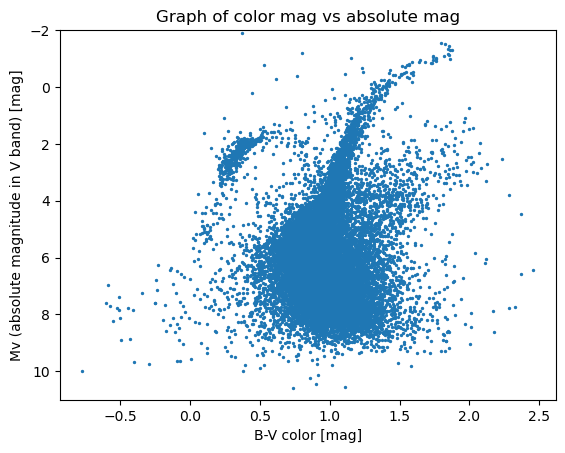

In [24]:
# Plot your data directly from the m22 dataframe below:
plt.scatter(m22['BVcolor'] , m22['Mv'] , s = 2)
plt.ylim (11 , -2)
plt.xlabel ("B-V color [mag]")
plt.ylabel ("Mv (absolute magnitude in V band) [mag]")
plt.title ("Graph of color mag vs absolute mag")

# Exercise 2 (Additional Clusters)

Now you will read in the data for the other clusters you downloaded from VizieR at the beginning of the lab and plot these data. For each cluster:
1. Comment the datafile as needed
2. Load the datafile using pandas (pd.read_csv)
3. Calculate the B-V color
4. Use your absolute magnitude function to calculate M$_{V}$ from the V mag and the distance to each cluster
5. Make plots! (multipanel and overlay)

In [25]:
# Load datafiles into new pandas dataframes. Be sure to check the datatypes -- if necessary, use pd.to_numeric.
m4 = pd.read_csv("M4.tsv" , comment= '#' , delimiter= ';')
m67 = pd.read_csv("m67.tsv" , comment= '#' , delimiter= ';')
ngc188 = pd.read_csv("NGC188.tsv" , comment= '#' , delimiter= ';')

In [26]:
m4.columns

Index(['_RAJ2000', '_DEJ2000', 'MKT', 'Vmag', 'e_Vmag', 'B-V', 'e_B-V', 'U-B',
       'e_U-B', 'Note', 'RAJ2000', 'DEJ2000'],
      dtype='object')

In [27]:
m4['B-V'] = pd.to_numeric(m4['B-V'], errors='coerce')
m4['Vmag'] = pd.to_numeric(m4['Vmag'], errors='coerce')

In [28]:
m67['Bmag'] = pd.to_numeric(m67['Bmag'], errors='coerce')
m67['Vmag'] = pd.to_numeric(m67['Vmag'], errors='coerce')

In [29]:
ngc188['Bmag'] = pd.to_numeric(ngc188['Bmag'], errors='coerce')
ngc188['Vmag'] = pd.to_numeric(ngc188['Vmag'], errors='coerce')

In [30]:
# Calculate B-V colors for NGC 188 and M67.
m67['BVcolor'] = m67['Bmag'] - m67['Vmag']
ngc188['BVcolor'] = ngc188['Bmag'] - ngc188['Vmag']
# Freebie! For M4, the B-V values are already provided in the table -- no need to calculate this one.

In [31]:
# Calculate absolute V magnitudes (recall that the distances to each cluster are given earlier in the lab)
m67['Mv'] = absmagcalc(dist_m67, m67['Vmag'])
ngc188['Mv'] = absmagcalc(dist_ngc188, ngc188['Vmag'])
m4['Mv'] = absmagcalc(dist_m4, m4['Vmag'])

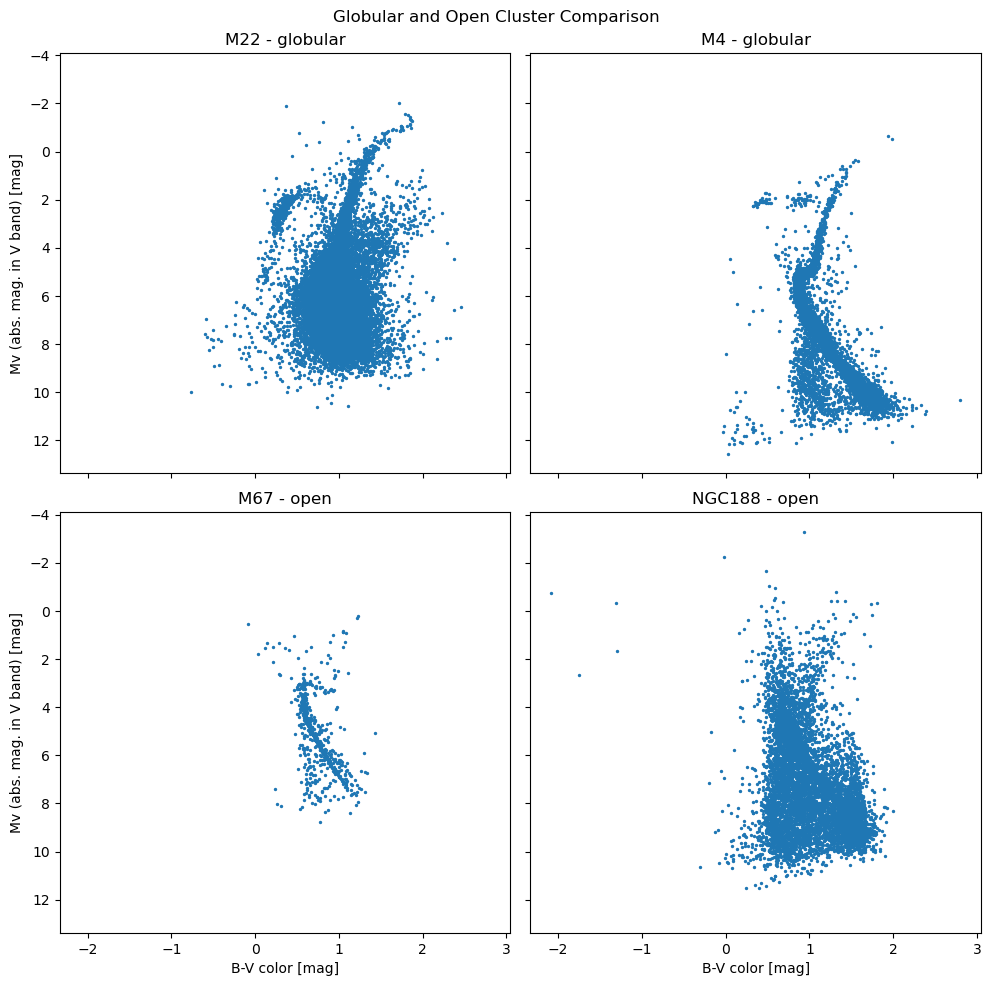

In [32]:
# Make a multipanel plot showing each of the four clusters.

# In each of the panel titles, put the name of the cluster and its type (e.g., "M22 - globular"):

fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(10,10),sharex=True, sharey=True)
fig.suptitle('Globular and Open Cluster Comparison')
# Continue the rest of the plotting below

# M22
ax1.scatter(m22['BVcolor'] , m22['Mv'] , s = 2)
ax1.yaxis.set_inverted(True) 
ax1.set_title ("M22 - globular")

# M4
ax2.scatter(m4['B-V'] , m4['Mv'] , s = 2)
ax2.yaxis.set_inverted(True) 
ax2.set_title ("M4 - globular")

# M67
ax3.scatter(m67['BVcolor'] , m67['Mv'] , s = 2)
ax3.yaxis.set_inverted(True) 
ax3.set_title ("M67 - open")

# NGC188
ax4.scatter(ngc188['BVcolor'] , ngc188['Mv'] , s = 2)
ax4.yaxis.set_inverted(True) 
ax4.set_title ("NGC188 - open")

ax1.set_ylabel("Mv (abs. mag. in V band) [mag]")
ax3.set_ylabel("Mv (abs. mag. in V band) [mag]")
ax3.set_xlabel ("B-V color [mag]")
ax4.set_xlabel ("B-V color [mag]")

fig.tight_layout(pad=1)

plt.show()

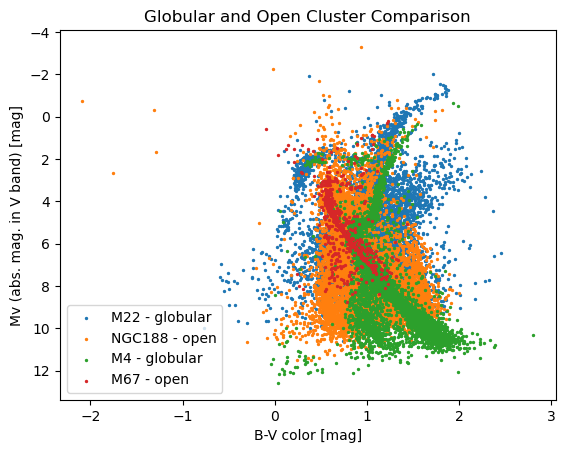

In [33]:
# Make an overlay plot showing all four clusters on the same axes.

# Hint: You may want to try changing the order in which you plot the datasets to make sure all datasets are visible.

fig, ax = plt.subplots()

ax.scatter(m22['BVcolor'] , m22['Mv'] , s = 2, label="M22 - globular")
ax.scatter(ngc188['BVcolor'] , ngc188['Mv'] , s = 2, label="NGC188 - open")
ax.scatter(m4['B-V'] , m4['Mv'] , s = 2, label="M4 - globular")
ax.scatter(m67['BVcolor'] , m67['Mv'] , s = 2, label="M67 - open")
ax.yaxis.set_inverted(True)

ax.set_ylabel("Mv (abs. mag. in V band) [mag]")
ax.set_xlabel("B-V color [mag]")
ax.set_title("Globular and Open Cluster Comparison")

plt.legend()
plt.show()

# Exercise 3 (Comprehension Questions)

<p>1) How do the color-magnitude diagrams (CMDs) you have plotted compare to the H-R diagrams from last week? What features are similar? What features are different?</p>
- While H-R diagram have more defined shapes and trends that we could observe, the distribution of stars is more chunky in CMDs. The main sequence is not as apparent in CMDs, although a patter seen in M67 may indicate the group. On the other hand, we can still see red giant branches in higher B-V and lower magnitude, corresponding their locations in H-R diagram. These features seeen particularly in M22, NGC188, and M4.


<p>2) Why do you think there is so much scatter in the observational data? Do you think this is an astrophysical effect or an instrumental one? What are some potential sources of error? </p>
- It could be both an astrophysical effect and instrumental one, although it is most likley instrumental. It could be an astrophysical effect such as redshift, but since these clusters are in our galaxy redshift wouldn't account for this much scatter. It is most likley an instrumental error such as light from other objects entering the telescope, or something on Earth affecting the gathering of data like the atmosphere, or the position of the telescope could be impacting the data collected.


<p>3) Which clusters do you think are older or younger? Rank NGC 188, M4, M22, and M67 by relative age. How can you tell?</p>
- Older clusters that have older stars tend to be redder and have many red giants. M22 and M4 show clear RGBs, but the proportion of red giants seem too be bigger in M22, suggesting it to be older. Between NGC188 and M67, M67 does not show any RGB faetures. Hence, from olderst to youngest, we would rank M22, M4, NGC188, and M67.


<p>4) Why might the main sequences be offset for each of the clusters? (Hint: How would uncertainty in a measured/estimated value shift values up/down on the Y-axis?)</p>
- The main sequence could be offset because of the types of stars in the clusters. The older star clusters would not have many blue stars, and the stars in that cluster would be further along in their lifecycle compared to a younger cluster, and as we saw in class, as stars age the main sequence line shifts on the HR diagram.


<p>5) Bonus question, if there's time: Earlier, we also calculated a V-I color column for M22. Plot the V vs. V-I CMD for M22. Why do you think the plot looks different from the V vs. B-V one?</p>
- Most stars in M22 have V-I color between 1 and 2, in contrast to B-V, which have most stars between 0.5 and 1.5. This indicates that there is wider difference in flux between V and I bands, while B and V bands have similar flux. Recalling the shape of Planck function, the peak is therefore in I (or redder) band rather than in B or V bands. This makes sense, as globular clusters tend to be old and redder.

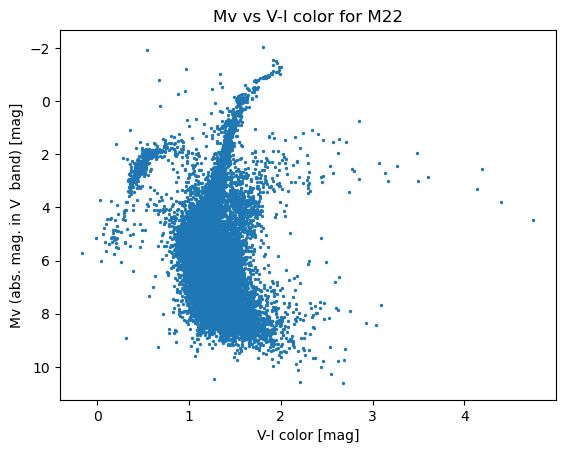

In [34]:
# Bonus Plot

fig, ax = plt.subplots()
ax.scatter(m22["VIcolor"], m22["Mv"], s=2)
ax.yaxis.set_inverted(True)
ax.set_xlabel("V-I color [mag]")
ax.set_ylabel("Mv (abs. mag. in V  band) [mag]")
ax.set_title("Mv vs V-I color for M22")
plt.show()

## Submission Instructions

Before submitting any Jupyter notebook for grading, please follow the following steps

**1) Hit the "Restart the kernel run the whole notebook" button**

Make sure the entire notebook runs from start to finish. If necessary, comment out any un-executable cells from the instructions portion of the lab so the whole notebook will execute in one go.

**2) Save as PDF (easiest method is with File > Print... > Save as PDF).**

**3) Make sure the names of all group members are in a markdown cell at the top of the file and submit the notebook through the Gradescope link for this lab**